# Data Processing in Python - Final Project <br>
## Vaccination in CR in terms of data <br>
### Karlíček Ondřej, Krejcar Vilém

# TBD/NÁPADY
 - propojit ty datasety a udělat třeba efektivitu/vytíženost jednotlivejch očkovacích míst/krajů
 - podívat se kde jsou ty očkovací místa ne tolik obsazený a proč
 - podívat se na data a proč je objem vakcinace cca stejnej napíč věkovejma skupinama když se očkování dělá postupně
     - nejspíš protože chronicky nemocní apod., idk
 - udělat jinej náhled na zpracování datasetu po řádcích (nice-to-have)
 - možná udělat nějakej scraping, abychom zahrnuli více věcí z přednášky
     - např. scrapnout z Wiki počet obyvatel v danym kraji a udělat z toho procento kolik už lidí z kraje je naočkováno
 - mapování očkování po týdnech, časových úsecích a udělat z toho nějakej graf
     - např. jak se vyvijí objem očkovaných lidí napříč časem a kde to roste nejvíce apod.
 - podívat se na grafy ze Seaborn, jsou tam fakt hezký

In [98]:
#importing packages needed for the work with data

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime

At first, let's explore dataset with basic information about vaccination in CR:

In [117]:
vaccination = pd.read_csv('https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani.csv')
vaccination.keys()

Index(['datum', 'vakcina', 'kraj_nuts_kod', 'kraj_nazev', 'vekova_skupina',
       'prvnich_davek', 'druhych_davek', 'celkem_davek'],
      dtype='object')

0        2020-12-27
1        2020-12-27
2        2020-12-27
3        2020-12-27
4        2020-12-27
            ...    
49141    2021-05-15
49142    2021-05-15
49143    2021-05-15
49144    2021-05-15
49145    2021-05-15
Name: datum, Length: 49146, dtype: object

In [100]:
vaccine_series = data["vakcina"].value_counts()
vaccine_series

Comirnaty                   23331
COVID-19 Vaccine Moderna    12149
VAXZEVRIA                   11431
COVID-19 Vaccine Janssen     2235
Name: vakcina, dtype: int64

Here we can see what the vaccine distribution in CR looks like. For better visualization, we will use a Pie Chart which will give better understanding of numbers. We also renamed the vaccines for people to understand it - they are presented not by their name, but by the name of company which makes them.

## Important info



Personally, I have a black theme of Jupyter, thus it is convinient for me to change the labels' colors - it can be changed by simply calling set_theme function - the values are either black/white depending on your theme of Jupyter.

In [146]:
text_color = ""
inner_circle_color = ""
def my_theme(color):
    global text_color
    global inner_circle_color
    if color == "black":
        text_color = "white"
        inner_circle_color = "black"
    elif color == "white":
        text_color = "black"
        inner_circle_color = "white"
    else: 
        raise ValueError("Please choose either black or white color")
    return f"Theme was set to {color}."


my_theme("black")

'Theme was set to black.'

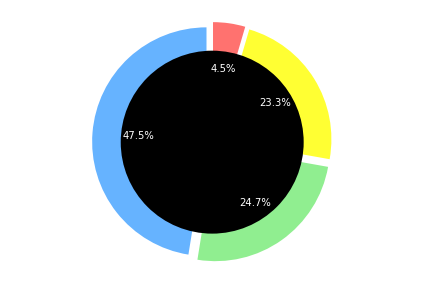

In [147]:
labels = ["Pfizer", "Moderna", "ArtraZeneca", "Johnson & Johnson"]
sizes = [vaccine_series[0], vaccine_series[1], vaccine_series[2], vaccine_series[3]]
#colors
colors = ["#66b3ff", "#90EE90", "#FFFF33", "#ff726f"]
#explsion
explode = (0.05, 0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct="%1.1f%%", startangle=90, textprops={"color":text_color}, explode = explode)
# we will make a circle
centre_circle = plt.Circle((0,0),0.8,fc=inner_circle_color)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis("equal")
# in order to remove the unnecessary data
plt.tight_layout()

Almost a half of the doses used in CR are produced by Pfizer, follower by a almost a quarter of total vaccines by Moderna and AstraZeneca and small portion of J&J's vaccine forms almost 5%.

In [152]:
vaccination["vekova_skupina"].value_counts()

70-74         3986
80+           3979
65-69         3950
60-64         3930
55-59         3928
75-79         3912
50-54         3854
45-49         3848
40-44         3745
35-39         3573
30-34         3362
25-29         3216
18-24         3134
0-17           689
nezařazeno      40
Name: vekova_skupina, dtype: int64

This series shows that the vaccinations doses are diatrubted quite evenly across all the age groups - WHY?! TBD

In [167]:
spotreba_dle_om = pd.DataFrame(pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-spotreba.csv"))
spotreba_dle_om


datum                     ockovaci_misto_id  \
0      2020-12-26  0f396137-e1fe-4e67-8291-292e4066376d   
1      2020-12-26  9295cb5e-e9ae-4858-97ce-5dadaf99ad72   
2      2020-12-27  6ad1717f-2bac-44e6-b7e9-6582da6b6598   
3      2020-12-27  b62c5314-15f8-4da2-95f0-0aedd6d11ac2   
4      2020-12-27  77079458-38f2-4bff-b983-7f99a07afdc3   
...           ...                                   ...   
17344  2021-06-10  a8b62b00-0e64-4b8d-8202-316e0c00f809   
17345  2021-06-11  a8b62b00-0e64-4b8d-8202-316e0c00f809   
17346  2021-06-14  a8b62b00-0e64-4b8d-8202-316e0c00f809   
17347  2021-06-15  a8b62b00-0e64-4b8d-8202-316e0c00f809   
17348  2021-06-22  a8b62b00-0e64-4b8d-8202-316e0c00f809   

                             ockovaci_misto_nazev kraj_nuts_kod  \
0                              FN Brno Výstaviště         CZ064   
1              Všeobecná fakultní nemocnice Praha         CZ010   
2                      Fakultní Nemocnice Bulovka         CZ010   
3                            Nemocnice Na Homolce         CZ010   
4                     Fakultní nemocnice v Motole         CZ010   
...                                           ...           ...   
17344  Nemocnice Rudolfa a Stefanie Benešov, a.s.         CZ020   
17345  Nemocnice Rudolfa a Stefanie Benešov, a.s.         CZ020   
17346  Nemocnice Rudolfa a Stefanie Benešov, a.s.         CZ020   
17347  Nemocnice Rudolfa a Stefanie Benešov, a.s.         CZ020   
17348  Nemocnice Rudolfa a Stefanie Benešov, a.s.         CZ020   

               kraj_nazev            ockovaci_latka  vyrobce  pouzite_ampulky  \
0       Jihomoravský kraj                 Comirnaty   Pfizer              487   
1      Hlavní město Praha                 Comirnaty   Pfizer              195   
2      Hlavní město Praha                 Comirnaty   Pfizer               42   
3      Hlavní město Praha                 Comirnaty   Pfizer                8   
4      Hlavní město Praha                 Comirnaty   Pfizer               77   
...                   ...                       ...      ...              ...   
17344    Středočeský kraj                 Comirnaty   Pfizer               35   
17345    Středočeský kraj                 Comirnaty   Pfizer               35   
17346    Středočeský kraj                 Comirnaty   Pfizer               75   
17347    Středočeský kraj                 Comirnaty   Pfizer              140   
17348    Středočeský kraj  COVID-19 Vaccine Moderna  Moderna              100   

       znehodnocene_ampulky  pouzite_davky  znehodnocene_davky  
0                         0           2922                   0  
1                         0           1170                   0  
2                         0            252                   0  
3                         0             48                   0  
4                         0            462                   0  
...                     ...            ...                 ...  
17344                     0            210                   0  
17345                     0            210                   0  
17346                     0            450                   0  
17347                     0            840                   0  
17348                     0           1000                   0  

[17349 rows x 11 columns]

In [158]:
spotreba_dle_om["davka_per_ampulka"] = spotreba_dle_om["pouzite_davky"]/spotreba_dle_om["pouzite_ampulky"]
print(spotreba_dle_om["davka_per_ampulka"].value_counts())
spotreba_dle_om[spotreba_dle_om["davka_per_ampulka"] != 6.0]["vyrobce"].value_counts()

6.0     13407
10.0     3847
Name: davka_per_ampulka, dtype: int64


Moderna        2771
AstraZeneca    1113
Pfizer           58
Name: vyrobce, dtype: int64

We can see that per one ampule, nurses can vaccinate 6 or 10 people depending on the type of the vaccine manufacturer: <br>
    - one ampule of Moderna and AstraZeneca can be split into 10 doses <br>
    - one ampule of Pfizer is usually split into 6 doses <br>

In [26]:
registrace_dle_om = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-registrace.csv")
registrace_dle_om

datum                     ockovaci_misto_id  \
0       2021-05-15  481dd978-47d9-46a2-a379-84fc06761772   
1       2021-05-15  ecdde69c-5828-46ca-a973-2ce3cb9ae1b6   
2       2021-05-15  85683ce8-5a0e-4733-b5e3-614d9d4ef335   
3       2021-05-15  da5422b1-8002-456c-aa95-9a26a5e0e622   
4       2021-05-15  ffddf34a-46dc-48a5-ba76-cf1c35339bf2   
...            ...                                   ...   
473716  2021-01-15  f61ca8f1-48b4-4381-86ca-e922e82b9066   
473717  2021-01-15  ecdde69c-5828-46ca-a973-2ce3cb9ae1b6   
473718  2021-01-15  ff1d41dd-18a2-45ed-bfee-8b2ff0022633   
473719  2021-01-15  5d4ec5da-2348-4a49-9661-ae1f9a60485a   
473720  2021-01-15  4ea9c79c-ebac-4505-8176-7d22ca45c0d2   

                              ockovaci_misto_nazev kraj_nuts_kod  \
0                         Vsetínská nemocnice a.s.         CZ072   
1                    Oblastní nemocnice Jičín a.s.         CZ052   
2                 Nemocnice ve Frýdku-Místku, p.o.         CZ080   
3                             Břeclav Dům školství         CZ064   
4                             Nemocnice Neratovice         CZ020   
...                                            ...           ...   
473716  Zdravotní ústav se sídlem v Ústí nad Labem         CZ042   
473717               Oblastní nemocnice Jičín a.s.         CZ052   
473718                     Nemocnice Brandýs n. L.         CZ020   
473719                           Nemocnice Sokolov         CZ041   
473720     ÚVN Praha - Vakcinační centrum COVID-19         CZ010   

                  kraj_nazev vekova_skupina  \
0               Zlínský kraj          65-69   
1       Královéhradecký kraj          50-54   
2       Moravskoslezský kraj          45-49   
3          Jihomoravský kraj          45-49   
4           Středočeský kraj          50-54   
...                      ...            ...   
473716          Ústecký kraj            80+   
473717  Královéhradecký kraj            80+   
473718      Středočeský kraj            80+   
473719      Karlovarský kraj            80+   
473720    Hlavní město Praha            80+   

                                                 povolani stat  rezervace  \
0       Na základě dosaženého věku (aktuálně se mohou ...   CZ        NaN   
1       Na základě dosaženého věku (aktuálně se mohou ...   CZ        NaN   
2       Na základě dosaženého věku (aktuálně se mohou ...   CZ        NaN   
3       Na základě dosaženého věku (aktuálně se mohou ...   CZ        NaN   
4       Na základě dosaženého věku (aktuálně se mohou ...   CZ        NaN   
...                                                   ...  ...        ...   
473716                                          neuvedeno   CZ        1.0   
473717                                          neuvedeno   CZ        1.0   
473718                                          neuvedeno   CZ        1.0   
473719                                          neuvedeno   CZ        1.0   
473720                                          neuvedeno   CZ        1.0   

       datum_rezervace  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
473716      2021-01-20  
473717      2021-01-15  
473718      2021-01-15  
473719      2021-01-15  
473720      2021-01-15  

[473721 rows x 10 columns]

In [40]:
registrace_dle_om["datum_rezervace"].isna().value_counts()

False    361136
True     112585
Name: datum_rezervace, dtype: int64

In [39]:
1-(registrace_dle_om["datum_rezervace"].isna().value_counts()[0]/(registrace_dle_om["datum_rezervace"].isna().value_counts()[0] + registrace_dle_om["datum_rezervace"].isna().value_counts()[1]))

0.2376609861078567

Almost 24 per cent of registered people don't have their vaccine reservation. Is it because maybe the reservation system is overflowed.

In [79]:
rezervace = pd.read_csv("https://onemocneni-aktualne.mzcr.cz/api/v2/covid-19/ockovani-rezervace.csv")
rezervace

datum                     ockovaci_misto_id  \
0       2021-06-15  ca2ebe9a-25f5-4386-a47a-1def0c83afa5   
1       2021-06-15  af350a27-6433-421b-8eb6-d22b4088c9be   
2       2021-06-15  381ef57d-e0e9-4079-a1b9-fd7d476a8aae   
3       2021-06-15  492920f2-e2f6-4d29-9b60-b1ec9924d84d   
4       2021-06-15  2c11f28c-f95b-4af0-8fd9-d33b104bafb9   
...            ...                                   ...   
112134  2021-01-15  1ddc573d-b6c1-4585-9729-999f36a0a6f1   
112135  2021-01-15  28d59069-2d52-40f5-a2a3-75b0daba1c2f   
112136  2021-01-15  8facdb9c-6716-4666-ae00-b58f7ccee441   
112137  2021-01-15  ccccfd3b-1362-49d5-b3b6-b0f71dc6d572   
112138  2021-01-15  ec7464b3-cfbd-4e49-8187-5f438f69c731   

                                     ockovaci_misto_nazev kraj_nuts_kod  \
0       Nemocnice TGM Hodonín, přísp. organizace Dům k...         CZ064   
1                            FN Brno - OČM Velké Meziříčí         CZ063   
2                      Státní zdravotní ústav - budova 11         CZ010   
3                 Nemocnice Kyjov, příspěvková organizace         CZ064   
4                            Poliklinika GILMEDA Vratimov         CZ080   
...                                                   ...           ...   
112134  Avenier a.s. Centrum očkování a cestovní medic...         CZ080   
112135               Masarykova nemocnice Rakovník s.r.o.         CZ020   
112136                    Oblastní nemocnice Trutnov a.s.         CZ052   
112137                              Nemocnice TGM Hodonín         CZ064   
112138   Kroměřížská nemocnice a.s. - Výstaviště Kroměříž         CZ072   

                  kraj_nazev  volna_kapacita  maximalni_kapacita  \
0          Jihomoravský kraj               0                 722   
1              Kraj Vysočina               0                   0   
2         Hlavní město Praha             192                 192   
3          Jihomoravský kraj               0                   0   
4       Moravskoslezský kraj               0                   0   
...                      ...             ...                 ...   
112134  Moravskoslezský kraj               0                   0   
112135      Středočeský kraj               0                   0   
112136  Královéhradecký kraj               0                   0   
112137     Jihomoravský kraj               0                   0   
112138          Zlínský kraj               0                   0   

       kalendar_ockovani  
0                     V2  
1                     VX  
2                     V2  
3                     VX  
4                     VX  
...                  ...  
112134                VX  
112135                VX  
112136                VX  
112137                VX  
112138                VX  

[112139 rows x 8 columns]